https://finance.yahoo.com/calendar/earnings/?day=2024-01-03


/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Options data for UNF:
Average IV for Calls: 0.309960378112793
Average IV for Puts: 0.42195876983642583
Total Call Volume: 26.0
Total Call open interest: 40
Total Call engagement: 66.0
Total Put Volume: 8.0
Total Put open interest: 10
Total Put engagement: 18.0
Number of ITM Call Options: 7
Number of ITM Put Options: 1


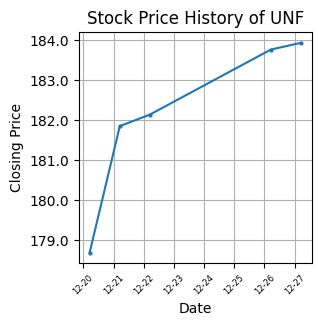

Data fetched for UNF, entries: 67


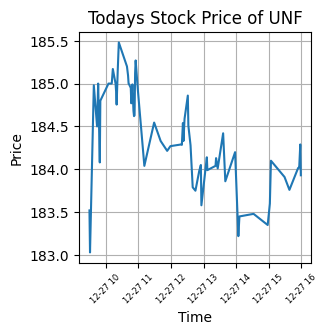

Options data for CALM:
Average IV for Calls: 0.5065823694534908
Average IV for Puts: 0.46148901564847505
Total Call Volume: 478.0
Total Call open interest: 13056
Total Call engagement: 13534.0
Total Put Volume: 602
Total Put open interest: 5299
Total Put engagement: 5901
Number of ITM Call Options: 37
Number of ITM Put Options: 7


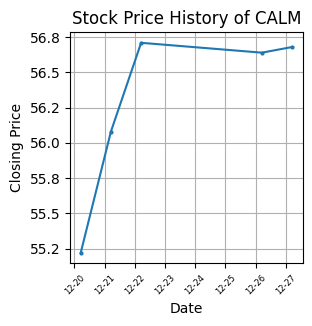

Data fetched for CALM, entries: 314


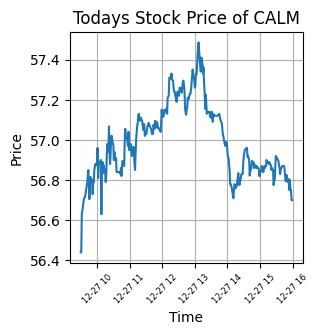

Options data for SLP:
Average IV for Calls: 0.5300106000061036
Average IV for Puts: 0.708606767730713
Total Call Volume: 21.0
Total Call open interest: 118
Total Call engagement: 139.0
Total Put Volume: 19.0
Total Put open interest: 106
Total Put engagement: 125.0
Number of ITM Call Options: 9
Number of ITM Put Options: 1


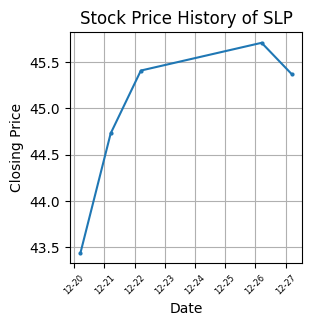

Data fetched for SLP, entries: 140


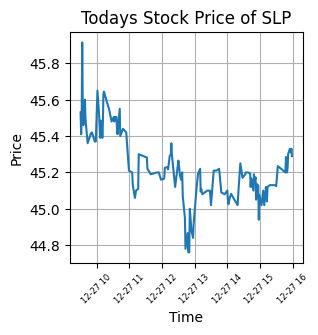

Options data for FC:
Average IV for Calls: 0.8611550020955404
Average IV for Puts: 0.8746983306884766
Total Call Volume: 75.0
Total Call open interest: 147
Total Call engagement: 222.0
Total Put Volume: 52
Total Put open interest: 130
Total Put engagement: 182
Number of ITM Call Options: 7
Number of ITM Put Options: 2


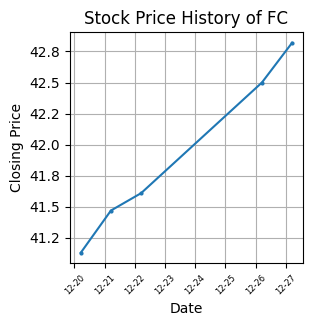

Data fetched for FC, entries: 48


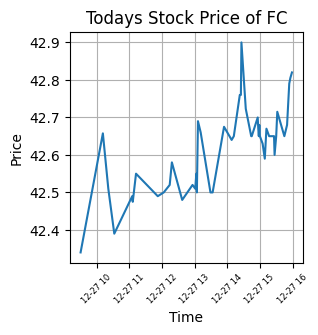

Options data for AEHR:
Average IV for Calls: 0.919256849844992
Average IV for Puts: 0.9775616492412409
Total Call Volume: 1818.0
Total Call open interest: 29375
Total Call engagement: 31193.0
Total Put Volume: 1249.0
Total Put open interest: 9432
Total Put engagement: 10681.0
Number of ITM Call Options: 45
Number of ITM Put Options: 51


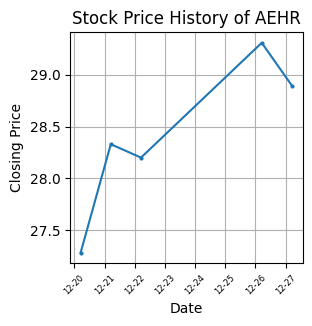

Data fetched for AEHR, entries: 338


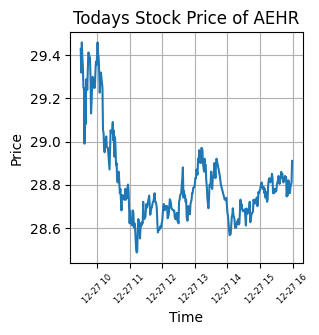

Options data for PKE:
Average IV for Calls: 0.5927509583875868
Average IV for Puts: 0.6555481494140625
Total Call Volume: 23.0
Total Call open interest: 130
Total Call engagement: 153.0
Total Put Volume: 4.0
Total Put open interest: 12
Total Put engagement: 16.0
Number of ITM Call Options: 2
Number of ITM Put Options: 2


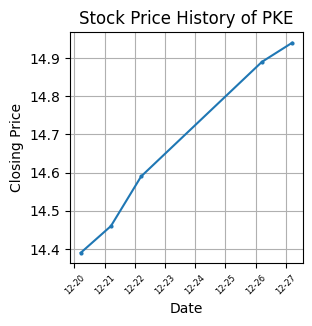

Data fetched for PKE, entries: 40


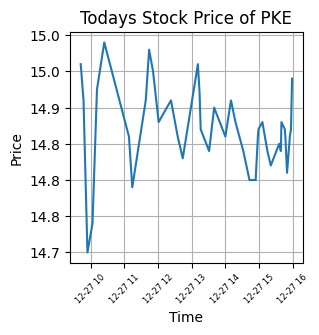

Options data for RGP:
Average IV for Calls: 0.5673261041259766
Average IV for Puts: 0.5976613299560547
Total Call Volume: 26.0
Total Call open interest: 190
Total Call engagement: 216.0
Total Put Volume: 9.0
Total Put open interest: 120
Total Put engagement: 129.0
Number of ITM Call Options: 2
Number of ITM Put Options: 2


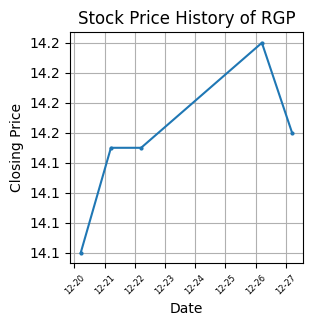

Data fetched for RGP, entries: 159


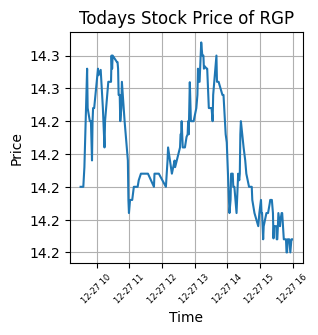

Options data for SICP:
Average IV for Calls: 1.838657366865987
Average IV for Puts: 0.8714255987691143
Total Call Volume: 884.0
Total Call open interest: 40114.0
Total Call engagement: 40998.0
Total Put Volume: 255.0
Total Put open interest: 14707.0
Total Put engagement: 14962.0
Number of ITM Call Options: 0
Number of ITM Put Options: 98


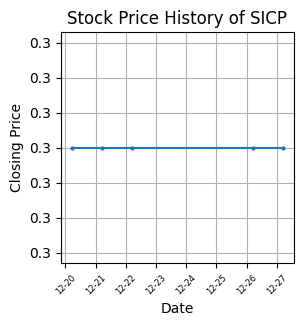

Data fetched for SICP, entries: 107


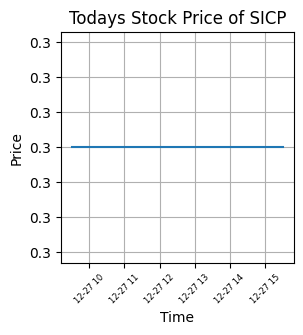

In [1]:
from datetime import datetime, timedelta
from analyze_stock import *  
from scrape_url import *

# Call the function and store the result
day = '2024-01-03'

# Set the time frame
date = datetime.strptime(day, '%Y-%m-%d')
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=14)

# Check if start_date is earlier than today, if not change start_date to today - 7 days
current_date = datetime.now()
start_date = current_date - timedelta(days=14) if start_date >= current_date else start_date

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if pd.isna(options_metrics['avg_put_implied_volatility']):
        continue
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    get_info(ticker, options_metrics, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted